# Decision Trees


## Introduction

http://users.sussex.ac.uk/~christ/crs/ml/lec04b.html

### Decision trees

* Supervised learning algorithm - training dataset with known labels

* Eager learning - final model does not need training data to make prediction (all parameters are evaluated during learning step)

* It can do both classification and regression

* A decision tree is built from:

    * **decision nodes** - correspond to features (attributes)
    * **leaf nodes** - correspond to class labels
    
* The **root** of a tree is (should be) the best predictor (feature)


### Example

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

* It is important to start with good predictor

    * Our choice of the root classifies 37.5% of points  in the first step
    
    * Note, that we could also start with `x > 9?`
    
    * However, if we started with `y > 3` we would never classify a point in the first step - does it mean that it is worse choice?

* In this case we never have to make more than 2 checks

* There are two open questions to answer:

    * How to automate the procees of chosing nodes?
    
    * How deep should we go?

## ID3 and C4.5 algorithms

* We start with algorithms based on information theory

    * ID3 (Iterative Dichotomiser 3)
    
    * C4.5 - extension of ID3 (why C4.5? C stands for programming language and 4.5 for version?)
    
    * C5.0/See5 - improved C4.5 (commercial; single-threaded Linux version is available under GPL though)
    
* The idea is to find nodes which maximize information gain

### Information gain

#### Self-information


* Let $X = (x_1, x_2, ..., x_n)$ be our *information source* (feature), e.g. weather condition: $x_1$ = sunny, $x_2$ = overcast, $x_3$ = rainy

* And let $$ P = (p_1, p_2, ..., p_n)$$ be corresponding probrability distribution (or more precisely - probability mass function)

* We want some measure of information $I$ provided by an event. It should satisfy the following properties:

    * $I$ depends only on the probability of $x_i$, thus $I \equiv I(p_i)$
    
    * $I$ is continuous and decreasing function of $p_i$
    
    * $I$ is non-negative and $I(1) = 0$
    
    * if $p_i = p_{i, 1} \dot p_{i, 2}$ (independent events) then $I(p_i) = I(p_{i, 1}) + I(p_{i, 2})$
    
* Logarithmic function satisfies all above condition, so we define self-information as: <p align="center"><br>$I(p) = -\log(p)$</p><br>

    * The most common log base is **2** and then information is in **shannons (Sh)**, also known as **bits**
    
    * In the case of **natural logarithm** the unit is **nat** (natural unit of information)
    
    * In the case of base **10** the unit is **hartley (Hart)**, also known as **dit**

* Lets X = (head, tail) with P = (0.5, 0.5)

    * We get 1 Sh of information

* Lets X = (sunny, overcast, rainy) with P = (0.25, 0.75, 0.25)

    * If it is overcast, we get 0.415 Sh of information
    
    * Otherwise, we get 2 Sh of information
    
* If an event is more likely we learn less

#### Information entropy

* Also called Shannon entropy (after the father of intromation theory)

* Usually information entropy is denoted as $H$

* $H$ is defined as the weighted average of the self-information of all possible outcomes <p align="center"><br>$H(X) = \sum\limits_{i=1}^N p_i \cdot I(p_i) = -\sum\limits_{i=1}^N p_i\cdot\log(p_i)$</p><br>

* Lets consider two case scenario with $P = (p, 1 - p)$, so entropy is given by $H = -p \log(p) - (1 - p) \log(1 - p)$

* Lets consider three case scenario with $P = (p, q, 1 - p - q)$, so entropy is given by $H = -p \log(p) - q\log(q) - (1 - p - q) \log(1 - p - q)$

#### Information gain

* Let $T$ be the set of training samples with $n$ possible outcomes, thus $T = \{T_1, T_2, ..., T_n\}$

* The entropy is given by <p align="center"><br>$H(T) = -\sum\limits_{i=1}^N p_i\cdot\log(p_i) = -\sum\limits_{i=1}^N \frac{|T_i|}{|T|}\cdot\log(\frac{|T_i|}{|T|})$</p><br>
    
* We can also calulate the entropy after $T$ was partitioned in $T_i$ with respect to some feature $X$ <p align="center"><br>$H(T, X) = \sum\limits_{i=1}^N p_i\cdot H(T_i)$</p>

* And the information gain is defined as <p align="center"><br>$G(X) = H(T) - H(T, X)$</p>

In [47]:
from math import log

def entropy(*probs):
  """Calculate information entropy"""
  try:
    total = sum(probs)
    return sum([-p / total * log(p / total, 2) for p in probs])
  except:
    return 0

print(entropy(9, 5), entropy(2, 1), entropy(2, 2))

0.9402859586706309 0.9182958340544896 1.0


### ID3 algorithm

* For every attribute (feature) calculate the entropy

* Split the training set using the one for which information gain is maximum

* Continue recursively on subsets using remaining features

### Play Golf dataset

* Popular dataset to explain decision trees

* 4 features:

    * **outlook**: *rainy, overcast, sunny*
    
    * **temperature**: *cool, mild, hot*
    
    * **humidity**: *normal, high*
    
    * **windy**: *false, true*
    
* Possible outcomes (play golf?):

    * **false**
    
    * **true**

In [9]:
import pandas as pd

# first row = headers
src = "weather.nominal.csv"

golf_data = pd.read_csv(src)

In [10]:
golf_data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


#### Play golf entropy

In [13]:
golf_data['play'].value_counts()

yes    9
no     5
Name: play, dtype: int64

In [14]:
entropy(9, 5)

0.9402859586706309

```
| Play golf |
=============
| yes | no  |  -> H(T) = 0.94
-------------

|  9  |  5  |
```

In [18]:
golf_data.groupby('outlook')['play'].value_counts().unstack()

play,no,yes
outlook,,
overcast,NaN,4
rainy,2,3
sunny,3,2


#### Play golf vs outlook

```
                   | Play golf |
                   =============
                   | yes | no  |
        ------------------------
        | sunny    |  3  |  2  |  5
outlook | overcast |  4  |  0  |  4
        | rainy    |  2  |  3  |  5
        ------------------------
                      9     5
```

In [ ]:
entropy(3, 2), 0, entropy(2, 3)

(0.9709505944546686, 0, 0.9709505944546686)

<br>

<p align="center">
\begin{eqnarray}
   H(\mbox{sunny}) & = & 0.97 \\
   H(\mbox{rainy}) & = & 0.97 \\
H(\mbox{overcast}) & = & 0
\end{eqnarray}
</p>

<br>

---

<br>

<p align="center">
\begin{eqnarray}
H(T, \mbox{outlook}) & = & P(\mbox{sunny})\cdot H(\mbox{sunny}) + P(\mbox{overcast})\cdot H(\mbox{overcast}) + P(\mbox{rainy})\cdot H(\mbox{rainy}) \\
                     & = & \frac{5}{14}\cdot 0.97 + \frac{4}{14} \cdot 0 + \frac{5}{14}\cdot 0.97 = 0.69
\end{eqnarray}
</p>

<br>

---

<br>

<p align="center">
\begin{eqnarray}
G(\mbox{outlook}) & = & H(T) - H(T, \mbox{outlook}) = 0.94 - 0.69 = 0.25
\end{eqnarray}
</p>

<br>

#### Results for all features

```
                    | Play golf |                         | Play golf |
                    =============                         =============
                    | yes | no  |                         | yes | no  |
         ------------------------                 --------------------
         | sunny    |  3  |  2  |                 | hot   |  2  |  2  |
 outlook | overcast |  4  |  0  |     temperature | mild  |  4  |  2  |
         | rainy    |  2  |  3  |                 | cool  |  3  |  1  |
         ------------------------                 --------------------
            Info. gain = 0.25                       Info gain = 0.03


                    | Play golf |                         | Play golf |
                    =============                         =============
                    | yes | no  |                         | yes | no  |
         ------------------------                 --------------------
         | high     |  3  |  4  |                 | false |  6  |  2  |
humidity | normal   |  6  |  1  |           windy | true  |  3  |  3  |
         ------------------------                 --------------------
            Info. gain = 0.15                       Info gain = 0.05
            

```

#### Root of the tree

* Start building a tree with the feature with the largest information gain: **outlook**

* A branch with **entropy 0** is a leaf node: **overcast**

* Other branches must be spliited using other features 

In [ ]:
golf_data.loc[golf_data['Outlook'] == "Sunny"]

,Outlook,Temperature,Humidity,Windy,Play golf
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
9,Sunny,Mild,Normal,False,Yes
13,Sunny,Mild,High,True,No


* In general, one should calculate information gain for each feature for this subset

* In this case it is clear that we can take **windy** 

#### Last branch

In [ ]:
golf_data.loc[golf_data['Outlook'] == "Rainy"]

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
10,Rainy,Mild,Normal,True,Yes


#### Summary

* We got the final tree for Play Golf dataset using ID3 algorithm

* We do not even use temperature attribute (for which information gain was 0.03)

* The main problem is that the algorithm may overfit easily (tree does not stop growing until the whole training set is classified)

    * Imagine some crazy guys went playing on a **rainy**, **windy** day with **high humidity**, beacaue it was still **hot**
    
    * With this extra data point we would have to create more branches
    
    * Is one unique data sample worth to extend the whole tree?

* And there is more disadvantages:

    * It handles only discrete attributes

    * There is a strong bias for features with many possible outcomes

    * And finally, it does not handle missing values

### C4.5 algorithm

* C4.5 introduces some improvements to ID3:

    * continuous values using threshold
    
    * tree pruning to avoid overfitting
    
    * normalized information gain
    
    * missing values


#### Pruning

* The algorithm creates as many nodes as needed to classify all test samples

* It may lead to overfitting and the resulting tree would fail to classify correctly unseen samples

* To avoid this one can prune a tree

    * pre-pruning (early stopping)
    
        * stop building a tree before leaves with few samples are produced
        
        * how to decide when it is good time to stop? e.g. using cross-validation on validation set (stop if the error does not increase significantly)
        
        * underfitting if stop to early
        
    * post-pruning
    
        * let a tree grow completely
        
        * then go from bottom to top and try to replace a node with a leaf
        
        * if there is improvement in accuracy - cut a tree
        
        * if the accuracy stays the same - cut a tree (Occam's razor)
        
        * otherwise leave a node   
      

#### Gini impurity

* We treat all values as they are continues

* And consider all possible split

* Every split leads to two subsets $S_1$ and $S_2$

* And gini impurity for a set $S$ for given split is given by: <p align="center">$I(S) = \frac{|S_1|}{|S|}\cdot I(S_1) + \frac{|S_2|}{|S|}\cdot I(S_2)$</p>

In [19]:
def gini(*distribution):
  """Calculate gini impurity for given ditribution of samples"""
  sum2 = sum(distribution)**2  # normalization factor
  
  return 1 - sum([p**2 for p in distribution])/sum2

In [20]:
def gini_split(s1, s2, g1, g2):
  """Calcualte impurity for given split
  
  s1 -- the size of S1 subset
  s1 -- the size of S2 subset
  g1 -- I(S1)
  g2 -- I(S2)
  """
  s = s1 + s2  # the total set size
  
  return s1/s * g1 + s2/s * g2

```
            | Play golf |
            =============
            | yes | no  |
      -------------------
      | yes |  2  |  3  | 5
rainy | no  |  7  |  2  | 9
      -------------------
               9     5
```

In [21]:
gini_split(5, 9, gini(2, 3), gini(7, 2))

0.3936507936507937

```
            | Play golf |
            =============
            | yes | no  |
      -------------------
      | yes |  3  |  2  | 5
sunny | no  |  6  |  3  | 9
      -------------------
               9     5
```

In [22]:
gini_split(5, 9, gini(3, 2), gini(6, 3))

0.45714285714285713

```
               | Play golf |
               =============
               | yes | no  |
         -------------------
         | yes |  4  |  0  | 4
overcast | no  |  5  |  5  | 10
         -------------------
                  9     5
```

In [23]:
gini_split(4, 10, gini(4, 0), gini(5, 5))

0.35714285714285715

* From *Outlook* feature the best choice is *Overcast* as it minimizes impurity

* However, we would have to check other features and choose the best predictor from all possibilities

* We have one step by step example done though

* So lets use some tool

### Scikit learn

* One step by step example is behind us, so now lets use some tool


* CART is implemented in `scikit-learn`

* However, their implementation takes only numerical values

* So we will use `LabelDecoder` to convert all values to numbers

In [24]:
from sklearn.preprocessing import LabelEncoder

# pandas.DataFrame.apply applies a function to given axis (0 by default)
# LabelEncoder encodes class labels with values between 0 and n-1
golf_data_num = golf_data.apply(LabelEncoder().fit_transform)

In [25]:
golf_data_num

,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


* Now, lets splits our dataset to features and labels

In [26]:
# DataFrame.iloc makes an access thourgh indices
# we want all rows and first 4 columns for features
# and the last column for labels
data = np.array(golf_data_num.iloc[:, :4])
target = np.array(golf_data_num.iloc[:, 4])

In [45]:
from sklearn import tree

golf_tree = tree.DecisionTreeClassifier(criterion='entropy')

golf_tree.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

* `sklearn.tree` supports drawing a tree using `graphviz`

[Text(325.2,501.795,'outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(243.9,390.285,'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(406.5,390.285,'humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = no'),
 Text(243.9,278.775,'outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = no'),
 Text(162.6,167.265,'windy <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(81.3,55.755,'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(243.9,55.755,'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(325.2,167.265,'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no'),
 Text(569.1,278.775,'windy <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = yes'),
 Text(487.8,167.265,'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = yes'),
 Text(650.4,167.265,'temperature <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(569.1,55.755,'entro

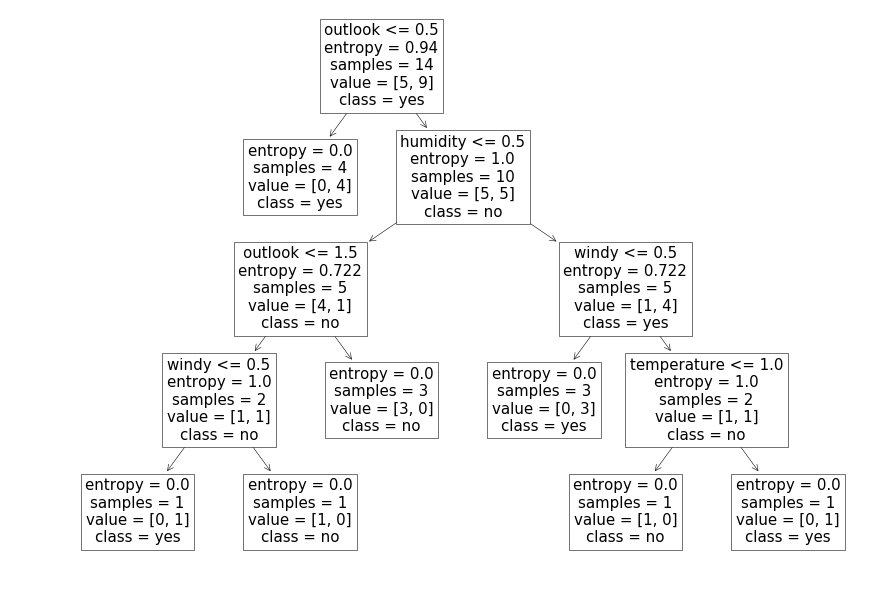

In [46]:
f,ax = plt.subplots(1,1)
tree.plot_tree(golf_tree,ax=ax,class_names=['no','yes'], feature_names = ['outlook',"temperature","humidity","windy","play"]) 